In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math
import sklearn.metrics as skm

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [71]:
data = pd.read_csv('data.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [72]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

<AxesSubplot:>

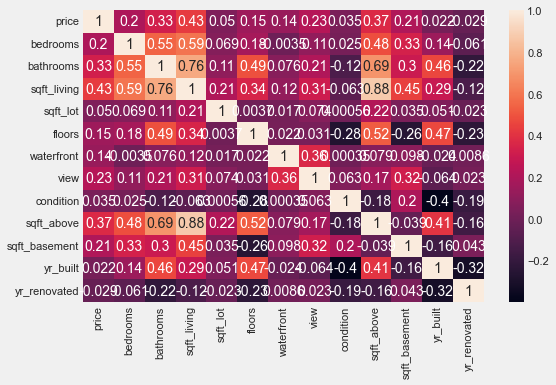

In [73]:
from matplotlib.pyplot import figure
figure(figsize=(8, 5))

# Creating a correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

Outliers of price are removed.

Outliers of yr_built are removed.



((array([-3.59729352, -3.35962078, -3.22850623, ...,  3.22850623,
          3.35962078,  3.59729352]),
  array([1900, 1900, 1900, ..., 2014, 2014, 2014], dtype=int64)),
 (28.799672376222407, 1970.8812340524241, 0.9754282728302026))

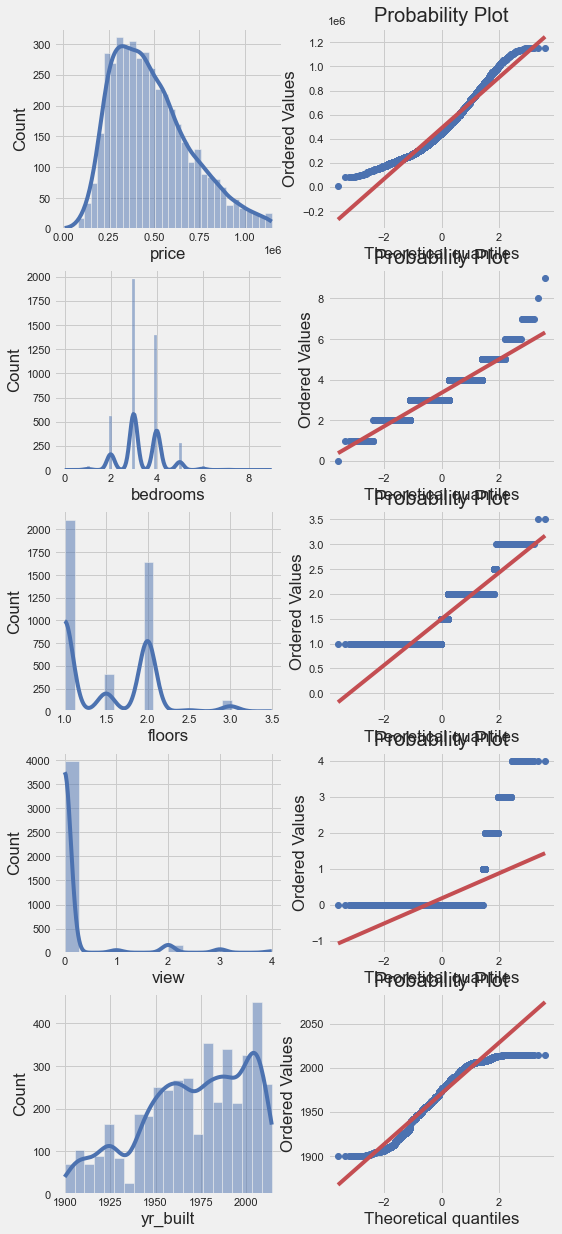

In [74]:
new_data=remove_outliers(data, 'price')
new_data=remove_outliers(new_data, 'yr_built')
fig = plt.figure(figsize=(8, 20))
grid = GridSpec(ncols=2, nrows=5, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0,0])
sns.histplot(new_data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[0, 1])
stats.probplot(new_data['price'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[1, 0])
sns.histplot(new_data['bedrooms'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1,1])
stats.probplot(new_data['bedrooms'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[2, 0])
sns.histplot(new_data['floors'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[2, 1])
stats.probplot(new_data['floors'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[3, 0])
sns.histplot(new_data['view'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[3,1])
stats.probplot(new_data['view'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[4, 0])
sns.histplot(new_data['yr_built'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[4, 1])
stats.probplot(new_data['yr_built'], plot=ax2)


In [75]:
new_data.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4311.0,487456.901904,215659.641022,7800.0,320000.00,450000.00,615000.0,1150000.00
bedrooms,4311.0,3.351659,0.881215,0.0,3.00,3.00,4.0,9.00
bathrooms,4311.0,2.094352,0.715171,0.0,1.75,2.25,2.5,5.75
sqft_living,4311.0,2030.697982,810.138266,370.0,1430.00,1920.00,2510.0,7320.00
sqft_lot,4311.0,14598.596149,36141.110719,638.0,5000.00,7566.00,10696.5,1074218.00
floors,4311.0,1.495129,0.536898,1.0,1.00,1.50,2.0,3.50
waterfront,4311.0,0.003711,0.060815,0.0,0.00,0.00,0.0,1.00
view,4311.0,0.173742,0.644964,0.0,0.00,0.00,0.0,4.00
condition,4311.0,3.443749,0.669194,1.0,3.00,3.00,4.0,5.00
sqft_above,4311.0,1747.008583,763.543329,370.0,1170.00,1540.00,2190.0,7320.00


In [76]:
import random
data_1 = new_data.sample(100)
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,487633.602724,223546.415701,120000.00,301500.0,448500.0,635000.00,1100000.0
bedrooms,100.0,3.310000,0.787465,2.00,3.0,3.0,4.00,5.0
bathrooms,100.0,2.052500,0.795580,0.75,1.5,2.0,2.50,5.5
sqft_living,100.0,1992.770000,844.354823,490.00,1330.0,1850.0,2425.00,5190.0
sqft_lot,100.0,12950.840000,17089.861166,907.00,6000.0,7489.5,11817.75,137565.0
floors,100.0,1.415000,0.482287,1.00,1.0,1.0,2.00,3.0
waterfront,100.0,0.010000,0.100000,0.00,0.0,0.0,0.00,1.0
view,100.0,0.150000,0.625631,0.00,0.0,0.0,0.00,4.0
condition,100.0,3.460000,0.626357,2.00,3.0,3.0,4.00,5.0
sqft_above,100.0,1728.480000,783.700642,490.00,1195.0,1490.0,2170.00,5190.0


In [77]:
import numpy as np
from scipy import stats
mean = data_1['yr_built'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_1['yr_built'] > mean) / len(data_1['yr_built'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_1['yr_built'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_1['yr_built'])-1, loc=mean, scale=stats.sem(data_1['yr_built']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



Mean: 1966.09
Greater than mean: 0.52
Test:  t = 664.75, p = 1.7334266060732522e-182
99% CI for the mean: (1958.32, 1973.86)
Reject the null hypothesis.


In [78]:
from scipy.stats import ttest_ind

# performing t-tests for continuous variables
f_stat, p_value = stats.f_oneway(data_1['price'], data_1['yr_built'],data_1['bedrooms'],data_1['floors'],data_1['view'])
print("Test:  t = {:.2f}, p = {}".format(f_stat, p_value))

Test:  t = 474.88, p = 7.146978209919292e-168


In [79]:
data_2 = new_data.sample(200)

mean = data_2['yr_built'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_2['yr_built'] > mean) / len(data_2['yr_built'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_2['yr_built'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_2['yr_built'])-1, loc=mean, scale=stats.sem(data_2['sqft_living']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Mean: 1970.32
Greater than mean: 0.54
Test:  t = 897.65, p = 0.0
99% CI for the mean: (1843.72, 2096.91)
Reject the null hypothesis.


Correlation coefficient: -0.051326694989422474
Hypothesis test: p = 0.47042037923977165
99% CI for the correlation: (-0.05, 0.47)
Fail to reject the null hypothesis.


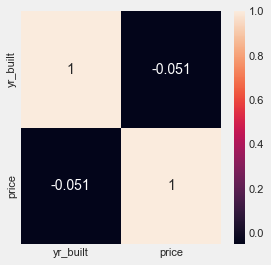

In [80]:
# Calculate the Pearson correlation coefficient
corr, p = stats.pearsonr(data_2['yr_built'], data_2['price'])

# Calculate a 99% confidence interval for the correlation
ci = np.around(stats.pearsonr(data_2['yr_built'], data_2['price']), decimals=2)

# Print the results
print("Correlation coefficient: {}".format(corr))
print("Hypothesis test: p = {}".format(p))
print("99% CI for the correlation: ({}, {})".format(ci[0], ci[1]))


df=data_2[['yr_built','price']]
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(4,4)})

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

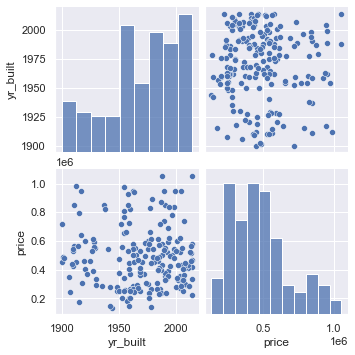

In [81]:
sns.pairplot(df)

In [82]:
x=df.iloc[:, 0].values
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01157
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.914
Time:                        22:10:52   Log-Likelihood:                -2186.0
No. Observations:                 160   AIC:                             4376.
Df Residuals:                     158   BIC:                             4382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.94e+05   1.05e+06      0.568      0.571   -1.47e+06    2.66e+06
x1           -57.0703    530.509     -0.108      0.914   -1104.874     990.733
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.952
Skew:                           0.749   Prob(JB):                     0.000566
Kurtosis:                       3.008   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

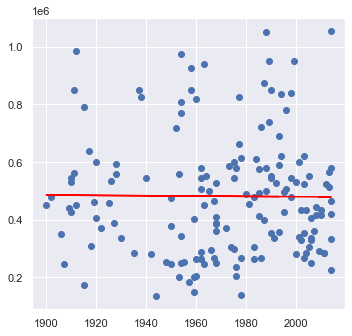

In [83]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.show()

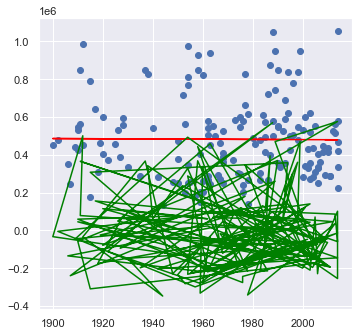

R2 score is:  0.002492263572493103


In [84]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.plot(x_train, ler.resid, color='green')
plt.show()

x_test_st = st.add_constant(x_test)
y_test_pred= ler.predict(x_test_st)
r2 = skm.r2_score(y_test, y_test_pred)
print('R2 score is: ',r2)

In [85]:
df1=new_data[['bedrooms', 'floors', 'yr_built','view','price']]
x = df1[['bedrooms', 'floors', 'yr_built','view']]
y = df1['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     227.2
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          2.73e-173
Time:                        22:10:54   Log-Likelihood:                -46854.
No. Observations:                3448   AIC:                         9.372e+04
Df Residuals:                    3443   BIC:                         9.375e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.519e+06   2.47e+05      6.139      0.000    1.03e+06       2e+06
bedrooms    6.826e+04   3798.598     17.969      0.000    6.08e+04    7.57e+04
floors      1.187e+05   7088.566     16.744      0.000    1.05e+05    1.33e+05
yr_built    -734.7992    128.496     -5.718      0.000    -986.736    -482.862
view        6.842e+04   5115.164     13.377      0.000    5.84e+04    7.85e+04
==============================================================================
Omnibus:                      180.557   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.613
Skew:                           0.597   Prob(JB):                     5.01e-46
Kurtosis:                       3.169   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
print(ler.rsquared_adj)

0.20790334785339315


<h5>The multi regression equation is : Y = 1.519e+06 + 6.826e+04 * (bedrooms) + 1.187e+05 * (floors) + -734.7992 * (yr_built) + 6.842e+04 * (view)</h5>

not a good fit